# The Economic Development of Rural Vietnam:
# Observations and Opportunities

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read Dataset (with a Lot of Cleaning)

# 1a. Merging and Cleaning Data

In [2]:
dfwiki = pd.ExcelFile('./Provincial Data Point.xlsx')

#Tried to merge 2005 - 2017 Data :(
#Data questions changed from Vietnamese to English in 2012 :( and content of questions changed
#Data questions changed each year, realized they needed to ask about perception and added that on top and eliminated others :(

In [3]:
WikiPull = dfwiki.parse()
Provinces_WikiPull = WikiPull['Province'].unique()

In [4]:
def read_pci_file(file_name):
    excel_file = pd.ExcelFile(file_name)
    merge_df = None
    for sheet_name in excel_file.sheet_names:
        df_sheet = excel_file.parse(sheet_name).drop_duplicates()
        if merge_df is None:
            merge_df = df_sheet.copy()
        else:
            merge_df = pd.merge(merge_df, df_sheet, on='Province')
    merge_df.isnull().sum()
    merge_df.dropna(how='all', inplace=True)
    if 'Rank' in merge_df.columns:
        merge_df.dropna(subset=['Rank'], inplace=True)
    merge_df2 = pd.merge(merge_df, WikiPull, on='Province')
    return merge_df2
merge_df = read_pci_file('./data/Appendix_1_Table_Indicator_PCI2017_EN.xlsx')

In [5]:
sum(merge_df.columns.value_counts() > 1)

0

In [6]:
merge_df.isnull().sum().sum()

0

In [7]:
data = Provinces_ExcelFile = merge_df['Province'].unique()

In [8]:
len(set(Provinces_ExcelFile) & set(Provinces_WikiPull))

63

# 1b. Reading Data Set

In [9]:
#What factors contribute to the perception of business development or hindrance in provinces
#relating to Ease of Entry, Business Support, and 
#How does regional variation, provincial specifics matter for this variation?

#Plot diagram to answer the question
#Build models to make it better

In [10]:
merge_df.head(10)
#exploring what data columns I get to play with

,Province,Rank,The Weighted PCI Score in 2017,Sub-Index 1: Entry Costs,Sub-Index 2: Land Access & Tenure,Sub-Index 3: Transparency_x,Sub-Index 4: Time Costs_x,Sub-Index 5: Informal Charges_x,Sub-Index 6: Policy Bias_x,Sub-Index 7: Proactivity_x,...,Was firm a victim of theft or break in last year? (% YES),Local police handle firm's break-in case effectively (%),Did firm have to pay money to gangsters groups (% YES),Area (km²),Population,Density (/km2),% Urban,HDI (2012),GDP per capita (2011 PPP US$)[4],Region
0,An Giang,32.0,62.158707,8.674999,6.372029,6.920630,6.876259,5.203520,4.987619,6.437278,...,0.236559,0.681818,0.045977,3536.8,2142709,605.8,28.4,0.730,3791.46,Mekong Delta
1,BRVT,16.0,64.433372,8.187503,5.942207,6.355465,6.422382,5.042396,4.327826,5.445249,...,0.160377,0.595238,0.049505,1989.6,996682,500.9,49.9,0.901,36786.39,Southeast
2,Bac Giang,30.0,62.198452,7.820781,6.539614,6.727785,5.701530,5.511934,4.719805,6.045018,...,0.135802,0.684211,0.028571,3827.4,1554131,406.1,9.4,0.711,1909.44,Northeast
3,Bac Kan,59.0,58.822109,6.246485,5.127361,6.646235,4.825339,4.280546,6.419474,4.148997,...,0.047059,0.666667,0.012821,4868.4,293826,60.4,16.1,0.685,1766.68,Northeast
4,Bac Lieu,42.0,61.090382,8.579387,6.546655,6.468497,6.698868,6.384815,5.930366,6.043301,...,0.252747,0.750000,0.036145,2584.1,856518,331.5,26.1,0.742,3701.98,Mekong Delta
5,Bac Ninh,17.0,64.356712,7.273473,6.567050,5.925251,6.649046,5.898842,3.846736,5.813507,...,0.108911,0.615385,0.044944,823.1,1024472,1244.7,23.5,0.771,4451.41,Red River Delta
6,Ben Tre,5.0,66.690735,7.883643,6.958159,6.212130,7.613153,6.391475,6.225450,7.011681,...,0.166667,0.812500,0.047619,2360.2,1255946,532.1,9.9,0.750,2978.48,Mekong Delta
7,Binh Dinh,18.0,64.082603,7.749138,6.793538,6.665337,6.483062,6.456434,5.627983,6.304780,...,0.140625,0.740741,0.033898,6039.6,1486465,246.1,27.7,0.742,3089.10,South Central Coast
8,Binh Duong,14.0,64.474556,7.660728,6.825497,6.516244,7.451314,5.381226,5.606045,6.035340,...,0.154762,0.666667,0.006173,2696.2,1481550,549.5,29.9,0.751,3663.54,Southeast
9,Binh Phuoc,62.0,56.701450,7.947760,6.389106,6.361876,5.763800,4.953068,4.150141,5.344986,...,0.215054,0.580645,0.050000,6883.4,873598,126.9,16.5,0.734,3606.56,Southeast


In [11]:
merge_df.tail()

,Province,Rank,The Weighted PCI Score in 2017,Sub-Index 1: Entry Costs,Sub-Index 2: Land Access & Tenure,Sub-Index 3: Transparency_x,Sub-Index 4: Time Costs_x,Sub-Index 5: Informal Charges_x,Sub-Index 6: Policy Bias_x,Sub-Index 7: Proactivity_x,...,Was firm a victim of theft or break in last year? (% YES),Local police handle firm's break-in case effectively (%),Did firm have to pay money to gangsters groups (% YES),Area (km²),Population,Density (/km2),% Urban,HDI (2012),GDP per capita (2011 PPP US$)[4],Region
58,Tra Vinh,37.0,61.708836,8.085987,7.305348,6.326732,7.909123,7.818160,6.307669,5.844946,...,0.151163,0.636364,0.000000,2295.1,1003012,437.0,15.3,0.717,2662.89,Mekong Delta
59,Tuyen Quang,39.0,61.511806,8.294600,6.056536,6.589673,5.788954,4.581478,4.909009,5.104384,...,0.142857,0.730769,0.039474,5870.4,724821,123.5,13.0,0.699,1948.18,Northeast
60,Vinh Long,6.0,66.072372,8.468634,6.692113,6.063775,7.402773,6.639066,5.352583,6.153907,...,0.096774,0.700000,0.000000,1479.1,1024707,692.8,15.3,0.757,3360.01,Mekong Delta
61,Vinh Phuc,12.0,64.898003,7.095162,5.767178,6.593346,7.268005,6.046066,4.995314,5.973986,...,0.162162,0.769231,0.029126,1373.2,999786,728.1,22.4,0.764,3990.61,Red River Delta
62,Yen Bai,46.0,60.720852,7.648221,5.359018,6.159721,5.893192,4.311386,5.239655,5.212481,...,0.065217,0.800000,0.035714,6899.5,740397,107.3,18.8,0.657,1845.51,Northeast


In [12]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 0 to 62
Columns: 158 entries, Province to Region
dtypes: float64(155), int64(1), object(2)
memory usage: 78.3+ KB


In [13]:
merge_df.describe()

,Rank,The Weighted PCI Score in 2017,Sub-Index 1: Entry Costs,Sub-Index 2: Land Access & Tenure,Sub-Index 3: Transparency_x,Sub-Index 4: Time Costs_x,Sub-Index 5: Informal Charges_x,Sub-Index 6: Policy Bias_x,Sub-Index 7: Proactivity_x,Sub-Index 8: Business Support Services_x,...,Good security situation in the province (%),Was firm a victim of theft or break in last year? (% YES),Local police handle firm's break-in case effectively (%),Did firm have to pay money to gangsters groups (% YES),Area (km²),Population,Density (/km2),% Urban,HDI (2012),GDP per capita (2011 PPP US$)[4]
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,...,63.000000,63.000000,63.000000,63.000000,63.000000,6.300000e+01,63.000000,63.000000,63.000000,63.000000
mean,32.000000,62.396843,7.799425,6.286399,6.297945,6.554949,5.373914,5.127357,5.532146,6.500402,...,0.564660,0.146409,0.698862,0.027632,5256.680952,1.396286e+06,456.677778,24.774603,0.726286,3563.131270
std,18.330303,2.943423,0.500101,0.590944,0.359828,0.810325,0.852751,0.769528,0.745088,0.593328,...,0.089873,0.051329,0.086722,0.015992,3686.374908,1.303661e+06,547.360770,15.977504,0.052193,4432.332588
min,1.000000,55.123222,6.246485,4.354074,5.326850,4.825339,4.096223,3.334866,3.633898,4.772668,...,0.339806,0.047059,0.437500,0.000000,823.100000,2.938260e+05,40.700000,9.400000,0.560000,1081.840000
25%,16.500000,60.579714,7.498890,5.987077,6.138479,6.070233,4.648548,4.665391,5.144709,6.177210,...,0.509091,0.111556,0.649906,0.017429,2327.650000,8.150550e+05,126.300000,15.000000,0.710500,2202.495000
50%,32.000000,62.158707,7.838291,6.333261,6.338750,6.483062,5.309570,5.139371,5.442083,6.607832,...,0.564815,0.135922,0.705882,0.028571,4760.100000,1.127903e+06,264.300000,19.000000,0.732000,2835.460000
75%,47.500000,64.395042,8.070281,6.649101,6.523891,7.125408,6.030849,5.617014,6.044159,6.865022,...,0.631456,0.172463,0.762353,0.038085,6804.000000,1.484008e+06,577.650000,28.500000,0.750000,3682.760000
max,63.000000,70.694397,8.925816,7.607831,7.251398,8.689983,7.818160,6.419474,7.071540,7.815090,...,0.773810,0.267327,0.894737,0.069767,16498.500000,8.262864e+06,3418.900000,86.900000,0.901000,36786.390000


In [14]:
merge_df.describe()['Good security situation in the province (%)']

count    63.000000
mean      0.564660
std       0.089873
min       0.339806
25%       0.509091
50%       0.564815
75%       0.631456
max       0.773810
Name: Good security situation in the province (%), dtype: float64

In [15]:
print(merge_df['Sub-Index 1: Entry Costs'].mean())
print(merge_df['Sub-Index 2: Land Access & Tenure'].mean())
print(merge_df['Sub-Index 3: Transparency_x'].mean())
print(merge_df['Sub-Index 4: Time Costs_x'].mean())
print(merge_df['Sub-Index 5: Informal Charges_x'].mean())
print(merge_df['Sub-Index 6: Policy Bias_x'].mean())
print(merge_df['Sub-Index 7: Proactivity_x'].mean())
print(merge_df['Sub-Index 8: Business Support Services_x'].mean())
print(merge_df['Sub-Index 9: Labor Policy_x'].mean())
print(merge_df['Sub-Index 10: Law & Order_x'].mean())

7.799425178103977
6.286399356902591
6.297945196666415
6.5549494501144165
5.373914347754584
5.127356691965981
5.532145579655965
6.500401807209802
6.415931663815937
5.888466993967692


In [16]:
merge_df.groupby('Region').mean()

,Rank,The Weighted PCI Score in 2017,Sub-Index 1: Entry Costs,Sub-Index 2: Land Access & Tenure,Sub-Index 3: Transparency_x,Sub-Index 4: Time Costs_x,Sub-Index 5: Informal Charges_x,Sub-Index 6: Policy Bias_x,Sub-Index 7: Proactivity_x,Sub-Index 8: Business Support Services_x,...,Good security situation in the province (%),Was firm a victim of theft or break in last year? (% YES),Local police handle firm's break-in case effectively (%),Did firm have to pay money to gangsters groups (% YES),Area (km²),Population,Density (/km2),% Urban,HDI (2012),GDP per capita (2011 PPP US$)[4]
Region,,,,,,,,,,,,,,,,,,,,,
Central Highlands,44.000000,60.050594,7.297989,6.525217,6.343820,5.909366,4.693005,5.401422,5.176982,6.622418,...,0.506097,0.162401,0.682477,0.039448,10931.920000,1.023025e+06,90.980000,27.720000,0.699600,2797.380000
Mekong Delta,26.461538,63.397955,8.197669,6.736032,6.323055,7.461749,6.444099,5.731918,6.067366,6.245545,...,0.543982,0.193385,0.691622,0.023568,3123.438462,1.322421e+06,483.800000,22.784615,0.745154,3540.573077
North Central Coast,35.000000,61.734313,7.971100,6.289382,6.282704,6.249657,4.832992,4.263992,5.496890,6.504200,...,0.543834,0.148103,0.766286,0.035352,8586.016667,1.678385e+06,188.450000,19.433333,0.717167,2479.881667
Northeast,35.818182,62.112871,7.611349,5.870189,6.325123,6.057390,4.908508,5.232159,5.325657,6.645699,...,0.616483,0.105339,0.715431,0.025894,5820.472727,8.614998e+05,175.054545,19.936364,0.691636,2489.565455
Northwest,54.250000,59.425341,7.696385,5.605862,6.424155,5.730517,4.532416,5.397055,4.952261,6.395855,...,0.685203,0.105041,0.784825,0.022685,9383.350000,6.805200e+05,83.875000,14.500000,0.630000,1696.975000
Red River Delta,30.200000,62.579596,7.496406,6.041293,5.994006,6.562955,5.321219,4.618545,5.291541,6.466974,...,0.545121,0.116134,0.696698,0.032414,1486.170000,1.945830e+06,1131.950000,21.880000,0.751200,2983.867000
South Central Coast,23.000000,63.957892,8.037875,6.495766,6.503990,6.624663,5.687373,5.233297,5.751059,6.549185,...,0.558167,0.165726,0.699555,0.018380,5545.762500,1.095605e+06,254.187500,35.612500,0.739375,3353.056250
Southeast,24.166667,62.961135,7.783351,6.456297,6.318424,6.789013,5.247649,4.787279,5.578002,6.741104,...,0.544948,0.157180,0.575776,0.029724,3934.016667,2.527894e+06,880.266667,38.066667,0.785500,9791.231667


# 2. Visualization

# 2a. Transparency

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


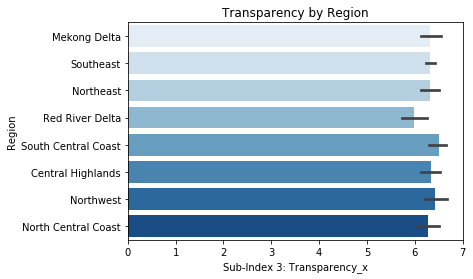

In [17]:
sns.barplot(x="Sub-Index 3: Transparency_x", y="Region", data=merge_df, palette="Blues")
plt.title('Transparency by Region')
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


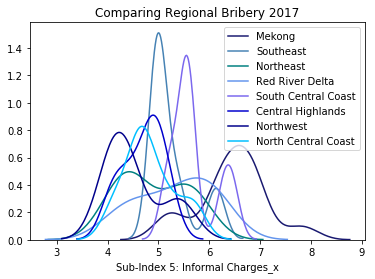

In [18]:
sns.distplot(merge_df[merge_df['Region'] == 'Mekong Delta']['Sub-Index 5: Informal Charges_x'], hist=False, label='Mekong', color = 'midnightblue')
sns.distplot(merge_df[merge_df['Region'] == 'Southeast']['Sub-Index 5: Informal Charges_x'], hist=False, label='Southeast', color = 'steelblue')
sns.distplot(merge_df[merge_df['Region'] == 'Northeast']['Sub-Index 5: Informal Charges_x'], hist=False, label='Northeast', color = 'teal')
sns.distplot(merge_df[merge_df['Region'] == 'Red River Delta']['Sub-Index 5: Informal Charges_x'], hist=False, label='Red River Delta', color = 'cornflowerblue')
sns.distplot(merge_df[merge_df['Region'] == 'South Central Coast']['Sub-Index 5: Informal Charges_x'], hist=False, label='South Central Coast', color = 'mediumslateblue')
sns.distplot(merge_df[merge_df['Region'] == 'Central Highlands']['Sub-Index 5: Informal Charges_x'], hist=False, label='Central Highlands', color = 'mediumblue')
sns.distplot(merge_df[merge_df['Region'] == 'Northwest']['Sub-Index 5: Informal Charges_x'], hist=False, label='Northwest', color = 'darkblue')
sns.distplot(merge_df[merge_df['Region'] == 'North Central Coast']['Sub-Index 5: Informal Charges_x'], hist=False, label='North Central Coast', color = 'deepskyblue')
plt.title('Comparing Regional Bribery 2017')
plt.show()

In [19]:
#Corruption / Informal Payments
def convert_percent(number):
    return 0
costs = merge_df['Formal and informal costs are acceptable (%)']
#merge_df['costs'] = pd.cut(costs, bins=10)
merge_df['costs'] = pd.cut(costs,bins=[0,.2,.4,.6,.8,1], labels=["Poor","Below Average","Average","Good","Great"])

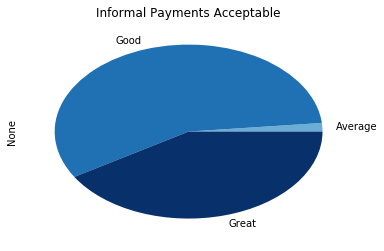

In [20]:
plot_df = merge_df.groupby('costs').size()
plot_df.plot(kind="pie", colormap = "Blues")
plt.title('Informal Payments Acceptable')
plt.show()

# 2b. Business Support Services

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


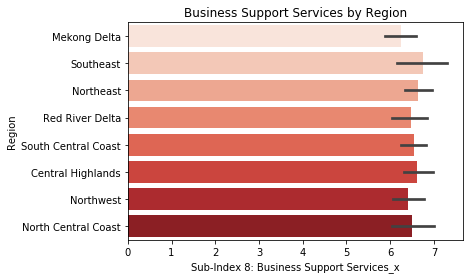

In [21]:
sns.barplot(x="Sub-Index 8: Business Support Services_x", y="Region", data=merge_df, palette="Reds")
plt.title('Business Support Services by Region')
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


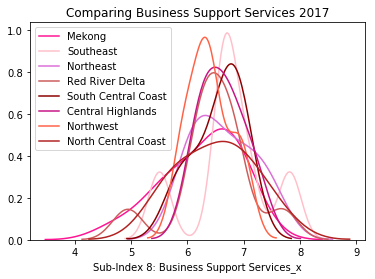

In [22]:
sns.distplot(merge_df[merge_df['Region'] == 'Mekong Delta']['Sub-Index 8: Business Support Services_x'], hist=False, label='Mekong', color = 'deeppink')
sns.distplot(merge_df[merge_df['Region'] == 'Southeast']['Sub-Index 8: Business Support Services_x'], hist=False, label='Southeast', color = 'pink')
sns.distplot(merge_df[merge_df['Region'] == 'Northeast']['Sub-Index 8: Business Support Services_x'], hist=False, label='Northeast', color = 'orchid')
sns.distplot(merge_df[merge_df['Region'] == 'Red River Delta']['Sub-Index 8: Business Support Services_x'], hist=False, label='Red River Delta', color = 'indianred')
sns.distplot(merge_df[merge_df['Region'] == 'South Central Coast']['Sub-Index 8: Business Support Services_x'], hist=False, label='South Central Coast', color = 'darkred')
sns.distplot(merge_df[merge_df['Region'] == 'Central Highlands']['Sub-Index 8: Business Support Services_x'], hist=False, label='Central Highlands', color = 'mediumvioletred')
sns.distplot(merge_df[merge_df['Region'] == 'Northwest']['Sub-Index 8: Business Support Services_x'], hist=False, label='Northwest', color = 'tomato')
sns.distplot(merge_df[merge_df['Region'] == 'North Central Coast']['Sub-Index 8: Business Support Services_x'], hist=False, label='North Central Coast', color = 'firebrick')
plt.title('Comparing Business Support Services 2017')
plt.show()

In [23]:
#Information Accessbility / Business Support Services
def convert_percent(number):
    return 0
transparent_info = merge_df['Received information requested (% YES)']
#merge_df['costs'] = pd.cut(costs, bins=10)
merge_df['transparent_info'] = pd.cut(costs,bins=[0,.3,.5,.7,.9,1], labels=["Poor","Below Average","Average","Good","Great"])

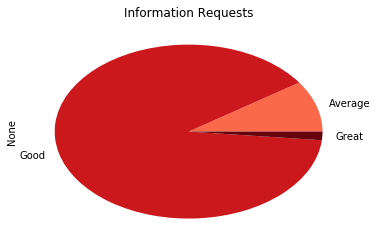

In [24]:
plot_transparency = merge_df.groupby('transparent_info').size()
plot_transparency.plot(kind="pie", colormap = "Reds")
plt.title('Information Requests')
plt.show()

# 2c. Ease of Entry

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


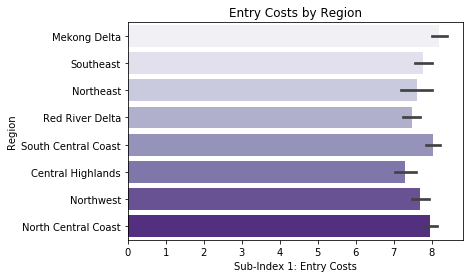

In [25]:
sns.barplot(x="Sub-Index 1: Entry Costs", y="Region", data=merge_df, palette="Purples")
plt.title('Entry Costs by Region')
plt.show()

In [26]:
#boolean index to select column and compare to a value
merge_df['Region'] == 'Central Highlands'
merge_df[merge_df['Region'] == 'Central Highlands']

,Province,Rank,The Weighted PCI Score in 2017,Sub-Index 1: Entry Costs,Sub-Index 2: Land Access & Tenure,Sub-Index 3: Transparency_x,Sub-Index 4: Time Costs_x,Sub-Index 5: Informal Charges_x,Sub-Index 6: Policy Bias_x,Sub-Index 7: Proactivity_x,...,Did firm have to pay money to gangsters groups (% YES),Area (km²),Population,Density (/km2),% Urban,HDI (2012),GDP per capita (2011 PPP US$)[4],Region,costs,transparent_info
15,Dak Lak,31.0,62.188370,6.994367,6.885027,6.338750,6.022337,4.878377,6.392806,5.384655,...,0.021053,13139.2,1733624,131.9,24.0,0.708,2555.78,Central Highlands,Good,Good
16,Dak Nong,63.0,55.123222,7.059816,6.288276,5.940401,6.178498,4.105275,4.395370,4.729417,...,0.069767,6516.9,489382,75.1,14.7,0.710,3000.70,Central Highlands,Good,Average
20,Gia Lai,43.0,60.913342,7.127839,6.902718,6.456360,5.227232,4.856318,5.423457,4.916304,...,0.040404,15536.9,1274412,82.0,28.6,0.689,3023.20,Central Highlands,Good,Good
32,Kon Tum,61.0,58.531990,7.794779,6.323004,6.330352,5.554141,4.463411,5.364508,5.182454,...,0.030928,9690.5,430133,44.4,33.5,0.656,2075.42,Central Highlands,Good,Good
34,Lam Dong,22.0,63.496048,7.513144,6.227060,6.653238,6.564624,5.161647,5.430968,5.672081,...,0.035088,9776.1,1187574,121.5,37.8,0.735,3331.80,Central Highlands,Great,Good


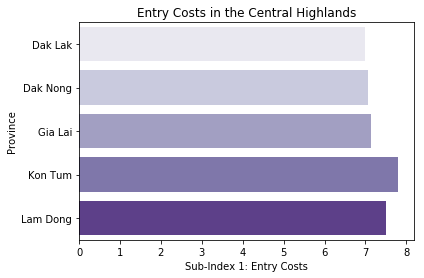

In [27]:
#merge_df[merge_df['Region'] == 'Central Highlands']['Sub-Index 1: Entry Costs'].plot(kind='bar')
#merge_df[merge_df['Region'] == 'Central Highlands'].plot(kind='barh', x='Province', y='Sub-Index 1: Entry Costs')
#plt.title('Entry Costs in the Central Highlands')
#plt.show()

central_highlands = merge_df[merge_df['Region'] == 'Central Highlands']
sns.barplot(x="Sub-Index 1: Entry Costs", y="Province", data=central_highlands, palette="Purples")
plt.title('Entry Costs in the Central Highlands')
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


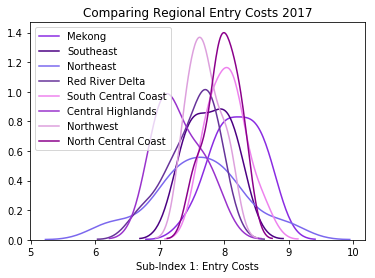

In [50]:
sns.distplot(merge_df[merge_df['Region'] == 'Mekong Delta']['Sub-Index 1: Entry Costs'], hist=False, label='Mekong', color = 'blueviolet')
sns.distplot(merge_df[merge_df['Region'] == 'Southeast']['Sub-Index 1: Entry Costs'], hist=False, label='Southeast', color = 'indigo')
sns.distplot(merge_df[merge_df['Region'] == 'Northeast']['Sub-Index 1: Entry Costs'], hist=False, label='Northeast', color = 'mediumslateblue')
sns.distplot(merge_df[merge_df['Region'] == 'Red River Delta']['Sub-Index 1: Entry Costs'], hist=False, label='Red River Delta', color = 'rebeccapurple')
sns.distplot(merge_df[merge_df['Region'] == 'South Central Coast']['Sub-Index 1: Entry Costs'], hist=False, label='South Central Coast', color = 'violet')
sns.distplot(merge_df[merge_df['Region'] == 'Central Highlands']['Sub-Index 1: Entry Costs'], hist=False, label='Central Highlands', color = 'darkorchid')
sns.distplot(merge_df[merge_df['Region'] == 'Northwest']['Sub-Index 1: Entry Costs'], hist=False, label='Northwest', color = 'plum')
sns.distplot(merge_df[merge_df['Region'] == 'North Central Coast']['Sub-Index 1: Entry Costs'], hist=False, label='North Central Coast', color = 'darkmagenta')
plt.title('Comparing Regional Entry Costs 2017')
plt.show()

In [29]:
#Information Requests / Ease of Entry
def convert_percent(number):
    return 0
support = merge_df['Procedures at one-stop-shop are transparently listed  (% Agree)']
#merge_df['costs'] = pd.cut(costs, bins=10)
merge_df['support'] = pd.cut(costs,bins=[0,.5,.65,.8,.9,1], labels=["Poor","Below Average","Average","Good","Great"])

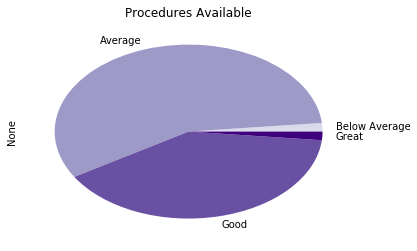

In [30]:
plot_access = merge_df.groupby('support').size()
plot_access.plot(kind="pie", colormap = "Purples")
plt.title('Procedures Available')
plt.show()

# 3. Preprocessing

In [31]:
merge_df.head(6)

,Province,Rank,The Weighted PCI Score in 2017,Sub-Index 1: Entry Costs,Sub-Index 2: Land Access & Tenure,Sub-Index 3: Transparency_x,Sub-Index 4: Time Costs_x,Sub-Index 5: Informal Charges_x,Sub-Index 6: Policy Bias_x,Sub-Index 7: Proactivity_x,...,Area (km²),Population,Density (/km2),% Urban,HDI (2012),GDP per capita (2011 PPP US$)[4],Region,costs,transparent_info,support
0,An Giang,32.0,62.158707,8.674999,6.372029,6.920630,6.876259,5.203520,4.987619,6.437278,...,3536.8,2142709,605.8,28.4,0.730,3791.46,Mekong Delta,Good,Good,Average
1,BRVT,16.0,64.433372,8.187503,5.942207,6.355465,6.422382,5.042396,4.327826,5.445249,...,1989.6,996682,500.9,49.9,0.901,36786.39,Southeast,Good,Good,Average
2,Bac Giang,30.0,62.198452,7.820781,6.539614,6.727785,5.701530,5.511934,4.719805,6.045018,...,3827.4,1554131,406.1,9.4,0.711,1909.44,Northeast,Good,Good,Average
3,Bac Kan,59.0,58.822109,6.246485,5.127361,6.646235,4.825339,4.280546,6.419474,4.148997,...,4868.4,293826,60.4,16.1,0.685,1766.68,Northeast,Good,Good,Average
4,Bac Lieu,42.0,61.090382,8.579387,6.546655,6.468497,6.698868,6.384815,5.930366,6.043301,...,2584.1,856518,331.5,26.1,0.742,3701.98,Mekong Delta,Great,Good,Good
5,Bac Ninh,17.0,64.356712,7.273473,6.567050,5.925251,6.649046,5.898842,3.846736,5.813507,...,823.1,1024472,1244.7,23.5,0.771,4451.41,Red River Delta,Good,Good,Average


In [32]:
merge_df['The Weighted PCI Score in 2017'] = pd.cut(costs,bins=[0,.5,.6,.7,.8,.9,1], labels=["Failing","Poor","Average","Good","Great","Excellent"])

In [33]:
merge_datamodel = pd.get_dummies(merge_df, columns=['Region', 'costs', 'transparent_info', 'support'], drop_first=True)

In [34]:
merge_datamodel.head()

,Province,Rank,The Weighted PCI Score in 2017,Sub-Index 1: Entry Costs,Sub-Index 2: Land Access & Tenure,Sub-Index 3: Transparency_x,Sub-Index 4: Time Costs_x,Sub-Index 5: Informal Charges_x,Sub-Index 6: Policy Bias_x,Sub-Index 7: Proactivity_x,...,costs_Good,costs_Great,transparent_info_Below Average,transparent_info_Average,transparent_info_Good,transparent_info_Great,support_Below Average,support_Average,support_Good,support_Great
0,An Giang,32.0,Good,8.674999,6.372029,6.920630,6.876259,5.203520,4.987619,6.437278,...,1,0,0,0,1,0,0,1,0,0
1,BRVT,16.0,Good,8.187503,5.942207,6.355465,6.422382,5.042396,4.327826,5.445249,...,1,0,0,0,1,0,0,1,0,0
2,Bac Giang,30.0,Good,7.820781,6.539614,6.727785,5.701530,5.511934,4.719805,6.045018,...,1,0,0,0,1,0,0,1,0,0
3,Bac Kan,59.0,Good,6.246485,5.127361,6.646235,4.825339,4.280546,6.419474,4.148997,...,1,0,0,0,1,0,0,1,0,0
4,Bac Lieu,42.0,Great,8.579387,6.546655,6.468497,6.698868,6.384815,5.930366,6.043301,...,0,1,0,0,1,0,0,0,1,0


In [35]:
X = merge_datamodel.drop(columns=['Province',  'Rank', 'The Weighted PCI Score in 2017'])
y = merge_datamodel['The Weighted PCI Score in 2017']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# 4. Creating Models

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
merge_datamodel.head()

,Province,Rank,The Weighted PCI Score in 2017,Sub-Index 1: Entry Costs,Sub-Index 2: Land Access & Tenure,Sub-Index 3: Transparency_x,Sub-Index 4: Time Costs_x,Sub-Index 5: Informal Charges_x,Sub-Index 6: Policy Bias_x,Sub-Index 7: Proactivity_x,...,costs_Good,costs_Great,transparent_info_Below Average,transparent_info_Average,transparent_info_Good,transparent_info_Great,support_Below Average,support_Average,support_Good,support_Great
0,An Giang,32.0,Good,8.674999,6.372029,6.920630,6.876259,5.203520,4.987619,6.437278,...,1,0,0,0,1,0,0,1,0,0
1,BRVT,16.0,Good,8.187503,5.942207,6.355465,6.422382,5.042396,4.327826,5.445249,...,1,0,0,0,1,0,0,1,0,0
2,Bac Giang,30.0,Good,7.820781,6.539614,6.727785,5.701530,5.511934,4.719805,6.045018,...,1,0,0,0,1,0,0,1,0,0
3,Bac Kan,59.0,Good,6.246485,5.127361,6.646235,4.825339,4.280546,6.419474,4.148997,...,1,0,0,0,1,0,0,1,0,0
4,Bac Lieu,42.0,Great,8.579387,6.546655,6.468497,6.698868,6.384815,5.930366,6.043301,...,0,1,0,0,1,0,0,0,1,0


# 4a. Logistic Regression Model

In [40]:
model = LogisticRegression()

In [41]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
prediction = model.predict(X_test)

In [43]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [44]:
confusion_matrix(y_test, prediction)

array([[0, 2, 0, 0],
       [0, 9, 3, 1],
       [0, 1, 3, 0],
       [0, 0, 0, 0]])

In [45]:
report = classification_report(y_test, prediction)
print(report)

             precision    recall  f1-score   support

    Average       0.00      0.00      0.00         2
       Good       0.75      0.69      0.72        13
      Great       0.50      0.75      0.60         4
       Poor       0.00      0.00      0.00         0

avg / total       0.62      0.63      0.62        19



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# 4b. Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
# create model
dtc = DecisionTreeClassifier(random_state=101)
# fit model
dtc.fit(X_train, y_train)
# predict base on test set
prediction = dtc.predict(X_test)

# classification_report confusion_matrix
matrix = confusion_matrix(y_test, prediction)
report = classification_report(y_test, prediction)
print(matrix)
print(report)

[[ 2  0  0]
 [ 0 13  0]
 [ 0  0  4]]
             precision    recall  f1-score   support

    Average       1.00      1.00      1.00         2
       Good       1.00      1.00      1.00        13
      Great       1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00        19



# 4c. Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [49]:
# create model
rfc = RandomForestClassifier()
# fit model
rfc.fit(X_train, y_train)
# predict base on test set
prediction = rfc.predict(X_test)
# classification_report confusion_matrix
report = classification_report(y_test, prediction)
print(matrix)
print(report)

[[ 2  0  0]
 [ 0 13  0]
 [ 0  0  4]]
             precision    recall  f1-score   support

    Average       0.00      0.00      0.00         2
       Good       0.86      0.92      0.89        13
      Great       0.80      1.00      0.89         4

avg / total       0.75      0.84      0.80        19



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# 5. Conclusions

- On the questions asked:
    - **Transparency Initiatives** should be invested in on two ends. First, management training for province officials and updating protocols into federal Foreign Investment policy to outline rights, obligations, and limitations on payments.
    - **Ease of Entry** should be improved with increased resources and robust toolkits that provinces provide to companies looking to enter. This concierge service for new businesses will provide instructions on how to integrate and invest.
    - **Business Support Services** should be improved with and resources, toolkits and increased transparency through websites and protocols that are externally held in order to provide companies with a picture of what is expected of them, not directly interpreted or demanded by the province in question.

- About the models built: 
    - **The strongest model is the Decision Tree.** I am able to determine which Province and respective index ranking based on any question in the survey right now with 100% recall and precision.
    - **The Random Forest is relatively strong.** If there were more data points, I think this would be a better model in the long-run. It is hitting 80% precision and 89% recall, with more data points, this number may improve and showcase all the potential decision tree categorizations that could combine.
    - **Logistic Regression Model** sucks. a 60% success rate is way below where I would want it to be. Because the data does not have historical points of past years yet, I think this could be improved, but not at the rate the Decision Tree or Random Forest would.

- Needs Going Forward
    - **MORE DATA** needs to be included with the past surveys (2005-2016).
    - **Further Research** on what drives development is a natural extension from these survey questions. More IF / THEN iterations on which of these factors plays the most significant role (heatmap?) in determining growth could provide insights as to which development initiatives should be prioritized over others if resources are limited.
